In [ ]:
#sentimate analysis for the social media data 

In [1]:
#import libraries
import tweepy
from textblob import TextBlob
from wordcloud import WordCloud
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

In [5]:
#load data
from google.colab import files
uploaded = files.upload()

Saving key.csv to key (1).csv


In [6]:
#get the data from the account
log = pd.read_csv('key.csv')

In [8]:
#twitter API Credentials
apiKey = log['apiKey'][0]
apiSecret = log['apiSecret'][0]
accessToken = log['accessToken'][0]
accessTokenScret = log['accessTokenScret'][0]

In [11]:
#authentication object
authenticate = tweepy.OAuthHandler(apiKey, apiSecret)

#set the acess token and acess token secret
authenticate.set_access_token(accessToken, accessTokenScret)

#Create the API object while passing in the authentication information
api = tweepy.API(authenticate, wait_on_rate_limit=True)

In [15]:
#Extract 100 tweets from the twitter user
posts = api.user_timeline(screen_name='@BillGates', count=100, lang = "en", tweet_mode="extended")

#show the last few tweets
print("Show recent tweets\n")
i=0
for tweet in posts[0:5]:
  print(str(i) + ') '+ tweet.full_text + '\n')
  i = i+1
  

Show recent tweets

0) RT @rajpanjabi: As a physician, I’ve seen too many colleagues make the ultimate sacrifice on the frontlines. Over 115,000 health and care w…

1) Polio tools and infrastructure are also critical to combatting other public health emergencies, like COVID-19. It is more important than ever that donors and countries commit to the new GPEI strategy to #endpolio and continue improving health for all. https://t.co/jaN6hPRT23

2) These young leaders make me optimistic that brighter days are ahead for America’s students and teachers. https://t.co/aiue8lKiZ6

3) Against the odds, @MohamedBailorB8 became a doctor and is helping his country recover from civil war, Ebola, and now COVID-19. This doctor’s life story is almost as remarkable as his work. https://t.co/giKIhT4W8b

4) This is an important step in the U.S. clean energy transition. I’m excited to see @TerraPower working with @PacifiCorp, @GovernorGordon, and @Energy to bring this project to life with the workforce of W

In [17]:
#create a dataframe with tweets
df = pd.DataFrame([tweet.full_text for tweet in posts], columns=['Tweets'])

#show recent ones
df.head()

,Tweets
0,"RT @rajpanjabi: As a physician, I’ve seen too ..."
1,Polio tools and infrastructure are also critic...
2,These young leaders make me optimistic that br...
3,"Against the odds, @MohamedBailorB8 became a do..."
4,This is an important step in the U.S. clean en...


In [18]:
#clean the text

#function to clean the tweets
def cleanText(text):
  text = re.sub(r'@[A-Za-z0-9]+', '', text)
  text = re.sub(r'#', '', text)
  text = re.sub(r'RT[\s]', '', text)
  text = re.sub(r'https?:\/\/\S+', '', text)

  return text

df['Tweets']=df['Tweets'].apply(cleanText)
df

,Tweets
0,": As a physician, I’ve seen too many colleague..."
1,Polio tools and infrastructure are also critic...
2,These young leaders make me optimistic that br...
3,"Against the odds, became a doctor and is help..."
4,This is an important step in the U.S. clean en...
...,...
95,One of the benefits of being 65 is that I’m el...
96,It’s great to see President Biden elevate scie...
97,And while COVID-19 will rightfully continue to...
98,The President’s commitment to reengage with th...


In [19]:
#get the subjectivity
def getSubjectivity(text):
  return TextBlob(text).sentiment.subjectivity

#get the polarity
def getPolarity(text):
  return TextBlob(text).sentiment.polarity

#creating the columns
df['Subjectivity'] = df['Tweets'].apply(getSubjectivity)
df['Polarity'] = df['Tweets'].apply(getPolarity)

df



,Tweets,Subjectivity,Polarity
0,": As a physician, I’ve seen too many colleague...",0.750000,0.250000
1,Polio tools and infrastructure are also critic...,0.532702,0.151894
2,These young leaders make me optimistic that br...,0.400000,0.100000
3,"Against the odds, became a doctor and is help...",0.750000,0.750000
4,This is an important step in the U.S. clean en...,0.816667,0.380556
...,...,...,...
95,One of the benefits of being 65 is that I’m el...,0.541667,0.525000
96,It’s great to see President Biden elevate scie...,0.750000,0.800000
97,And while COVID-19 will rightfully continue to...,0.541667,0.525000
98,The President’s commitment to reengage with th...,0.600000,-0.400000


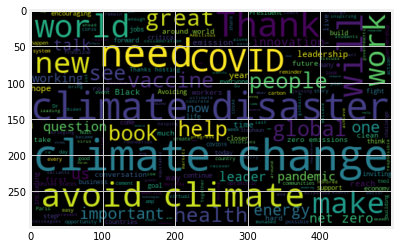

In [22]:
#word cloud
allWords = ' '.join( [twts for twts in df['Tweets']] )
wordCloud = WordCloud(width=500, height=300, random_state = 21, max_font_size = 119).generate(allWords)

plt.imshow(wordCloud, interpolation="bilinear")
#plt.access('off')
plt.show()

In [24]:
#create a function to compute the world weight analysis
def getAnalysis(score):
  if score<0:
    return 'Negative'
  elif score == 0:
    return 'Neutral'
  else:
    return 'Positive'

df['Analysis']=df['Polarity'].apply(getAnalysis)

#show the data Frame
df

,Tweets,Subjectivity,Polarity,Analysis
0,": As a physician, I’ve seen too many colleague...",0.750000,0.250000,Positive
1,Polio tools and infrastructure are also critic...,0.532702,0.151894,Positive
2,These young leaders make me optimistic that br...,0.400000,0.100000,Positive
3,"Against the odds, became a doctor and is help...",0.750000,0.750000,Positive
4,This is an important step in the U.S. clean en...,0.816667,0.380556,Positive
...,...,...,...,...
95,One of the benefits of being 65 is that I’m el...,0.541667,0.525000,Positive
96,It’s great to see President Biden elevate scie...,0.750000,0.800000,Positive
97,And while COVID-19 will rightfully continue to...,0.541667,0.525000,Positive
98,The President’s commitment to reengage with th...,0.600000,-0.400000,Negative


In [26]:
#print all of the positive tweets
j=1
sortedDF = df.sort_values(by=['Polarity'])
for i in range(0, sortedDF.shape[0]):
  if (sortedDF['Analysis'][i]=='Positve'):
    print(str(j) + ') ' + sortedDF['Tweets'][i])
    print()
    j = j+1

In [27]:
#print all the negative tweets
j=1
sortedDF = df.sort_values(by=['Polarity'], ascending='False')
for i in range(0, sortedDF.shape[0]):
  if (sortedDF['Analysis'][i]=='Negative'):
    print(str(j) + ') ' + sortedDF['Tweets'][i])
    print()
    j = j+1

1) Communities of color have been hit hard by COVID-19. One of the reasons why parts of the medical system often fail Black and brown people is because it’s not designed with them in mind. Dr. Stephaun Wallace wants to change that. 

2) Dr. Stephaun Wallace () has spent the last year helping make COVID-19 vaccines work for everybody. Stephaun and his colleagues at  are working to reach the people who are usually left behind. 

3) It’s deeply unfair that the people who contribute the least to climate change will suffer the worst from its effects:  

4) : Over the past few weeks health workers in Ethiopia 🇪🇹, Nigeria 🇳🇬, Sudan 🇸🇩 and the Philippines 🇵🇭 were vaccinated against COVI…

5) For decades, Australian researcher Ruth Bishop led global efforts to identify and combat rotavirus. Her life is a reminder of the importance of scientific research to uncover unknown pathogens and the power of vaccines to prevent suffering and save lives. 

6) : Black folks have questions about the COVID-1

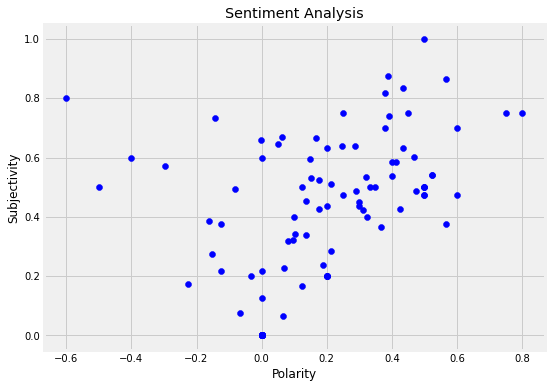

In [28]:
#plot the values
plt.figure(figsize=(8,6))
for i in range (0, df.shape[0]):
  plt.scatter(df['Polarity'][i], df['Subjectivity'][i], color='Blue')

plt.title('Sentiment Analysis')
plt.xlabel('Polarity')
plt.ylabel('Subjectivity')
plt.show()

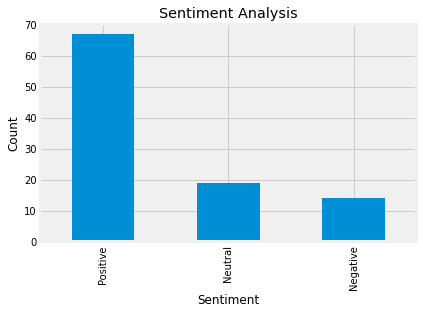

In [29]:
#show the final data values
df['Analysis'].value_counts()

#plot the values
plt.title('Sentiment Analysis')
plt.xlabel('Sentiment')
plt.ylabel('Count')
df['Analysis'].value_counts().plot(kind='bar')
plt.show()